# Descriptive Statistics
Statistik yang digunakan untuk mendeskripsikan data. Menggunakan angka untuk menjelaskan sekelompok data.

### Histogram
grafik yang menunjukkan distribusi data. memperlihatkan frekuensi atau jumlah sebuah data muncul. misalkan di kelas A ada 10 orang yang skornya 30-40, maka di grafik histogramnya, value y-axis adalah 10. value x-axis adalah 30-40.

berbeda dengan line chart, scatter plot, bar chart dimana value x-axis adalah nama setiap murid (ada 10 murid disini) lalu value y-axis adalah nilai masing-masing murid.

histogram merangkum frekuensi nya saja. nilai setiap murid TIDAK terlihat di histogram.

## Measure of Central Tendency (histogram)
mengukur "tengah" data dimana
- mean (rata-rata)
- median (data diurut kecil ke besar, dan yang di posisi tengah adalah median)
- mode (data yang paling sering muncul)

## Measure of Spread (histogram, boxplot)
mengukur "penyebaran" data biasanya dari tengah tadi
- standard deviation
- variance
- quartiles/ percentiles
- range, inter-quartile range

- skewness
- kurtosis

## Correlation (scatter plot)
mencari hubungan antara dua set data




In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

import scipy.stats

In [ ]:
# import contoh data
df_shop = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/shopping_behavior_updated.csv")
df_shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

<Axes: ylabel='Frequency'>

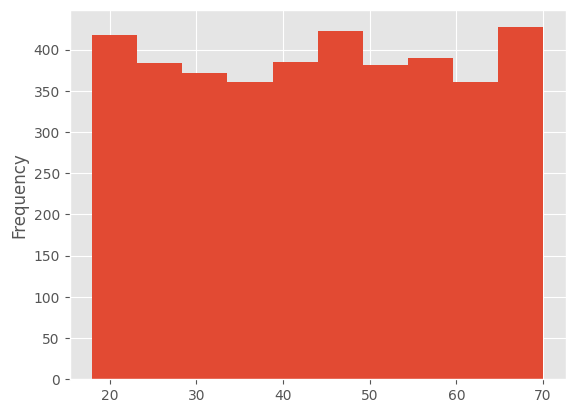

In [ ]:
# biasanya yang shopping sama kita, umur berapa? di umur berapa paling banyak?
# kita bisa buat histogram untuk melihat pembagian braket umur tertentu masing-masing ada berapa orang

df_shop['Age'].plot(kind="hist")

In [ ]:
data_umur = df_shop['Age']

In [ ]:
# buat pemisah x-ticks di x-axis nya sesuai dengan maing masing bin di histogram
# bin adalah 1 bar di histogram
# secara default ada 10 bin di grafik histogram buatan matplotlib

# kita minta bantuan numpy untuk buat pemisahnya
np.histogram(data_umur)

(array([418, 384, 371, 361, 385, 422, 381, 390, 361, 427]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]))

np.histogram akan memberikan kita 2 set data. set pertama adalah count/ frekuensi. set kedua adalah pembatas setiap bin di histogram.

data diatas menunjukkan di umur 18-23.2 ada 418 orang.
di umur 23.2-28.4 ada 384 orang. di 67.8-70 ada 427 orang.

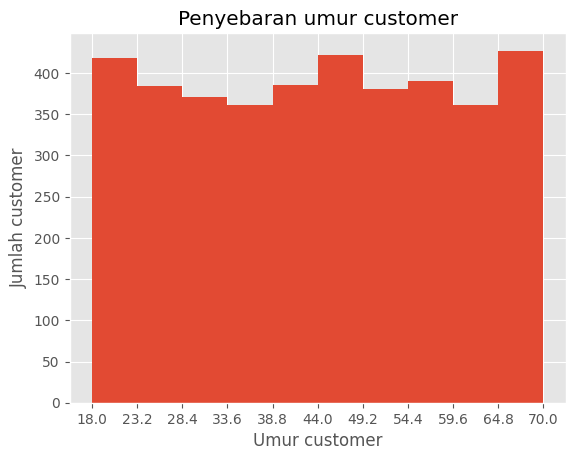

In [ ]:
# buat jadi visual
freq, bin_edges = np.histogram(data_umur)

data_umur.plot(kind="hist")

plt.xticks(bin_edges)

# tambahin label di grafik
plt.title("Penyebaran umur customer")
plt.ylabel("Jumlah customer")
plt.xlabel("Umur customer")

plt.show()

## latihan pendek
- buatlah histogram dari harga produk yang dijual.
- produk di range harga berapa yang paling banyak terjual?
- tambahkan filter, misalnya category produk tertentu, baru buat histogram harga lagi.

In [ ]:
df_shop["Purchase Amount (USD)"]

0       53
1       64
2       73
3       90
4       49
        ..
3895    28
3896    49
3897    33
3898    77
3899    81
Name: Purchase Amount (USD), Length: 3900, dtype: int64

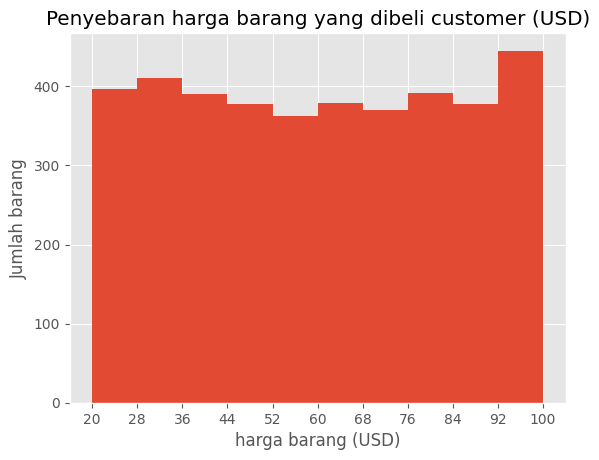

In [ ]:
data = df_shop["Purchase Amount (USD)"]

# buat jadi visual
freq, bin_edges = np.histogram(data)

data.plot(kind="hist")

plt.xticks(bin_edges)

# tambahin label di grafik
plt.title("Penyebaran harga barang yang dibeli customer (USD)")
plt.ylabel("Jumlah barang")
plt.xlabel("harga barang (USD)")

plt.show()

berikut histogram data harga barang yang terjual

produk di range harga berapa yang paling banyak terjual? di harga antara 92-100 paling banyak terjual.

In [ ]:
freq

array([396, 411, 390, 378, 362, 379, 370, 391, 378, 445])

In [ ]:
# ada Category apa saja?
df_shop["Category"].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

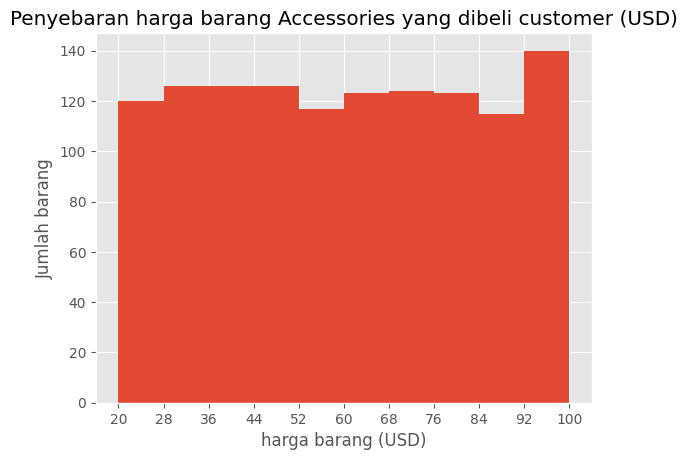

In [ ]:
# tambahkan filter, misalnya category produk tertentu, baru buat histogram harga lagi
# di category ini, harga barang biasanya berapa?

data_category_accessories = df_shop[df_shop["Category"] == "Accessories"]
data = data_category_accessories["Purchase Amount (USD)"]

# buat jadi visual
freq, bin_edges = np.histogram(data)

data.plot(kind="hist")

plt.xticks(bin_edges)

# tambahin label di grafik
plt.title("Penyebaran harga barang Accessories yang dibeli customer (USD)")
plt.ylabel("Jumlah barang")
plt.xlabel("harga barang (USD)")

plt.show()

# Descriptive Statistics
## Measure of Central Tendency
kita gunakan Python dan package2nya untuk melihat data punya "tengah" dimana
- mean
- median
- mode

sebagai contoh, kita gunakan data tentang mobil https://raw.githubusercontent.com/stefkwan-h8/dataset/main/CarPrice_Assignment.csv

In [ ]:
df_car = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/CarPrice_Assignment.csv")
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# mean
# berapa rata-rata harga mobil?

# menggunakan pandas untuk mencari mean
df_car["price"].mean()

13276.710570731706

median adalah titik tengah di sebuah set data.

misalkan harga mobilnya adalah `[10rb, 20rb, 24rb, 100rb]` (data 4 mobil), maka mediannya adalah `(20+24)/2`

sebelum mencari median kita perlu mengurutkan data dulu dari kecil ke besar, dan kita ambil antara 1 angka tengah (data ganjil) atau 2 angka tengah yang dibagi dua (data genap)

misalkan harga mobilnya adalah `[10rb, 20rb, 22rb, 24rb, 100rb]` (data 5 mobil), maka mediannya adalah `22rb`

median memberitahu kita kalau stengah dari semua data yang ada di dataset kita diatas angka ini. dibawah angka ini juga.

In [ ]:
# median
# berapa median harga mobilnya?

# menggunakan pandas untuk mencari median
df_car["price"].median()

10295.0

mode adalah satu data yang paling sering muncul.

biasanya kurang berguna untuk data yang sifatnya continuous seperti harga mobil, berat badan, tinggi badan, jarak, waktu, yang terus berjalan tanpa pemisah nominal yang pasti (10.000 10.500 beda 10.501 beda lagi)

In [ ]:
# mode
# mobil harga berapa yang paing sering terjual?
df_car["price"].mode()

0      5572.0
1      6229.0
2      6692.0
3      7295.0
4      7609.0
5      7775.0
6      7898.0
7      7957.0
8      8495.0
9      8845.0
10     8916.5
11     8921.0
12     9279.0
13    13499.0
14    16500.0
15    18150.0
Name: price, dtype: float64

pandas memberi tahu semua angka yang jumlahnya sama. mobil harga 5572, 6229, ... sama banyaknya.

In [ ]:
def buat_hist(data, label="", labely="", labelx="", size=(12,6)):
  freq, bin_edges = np.histogram(data)
  data.plot(kind="hist", figsize=size)
  plt.xticks(bin_edges)

  plt.title(label)
  plt.ylabel(labely)
  plt.xlabel(labelx)

  plt.show()

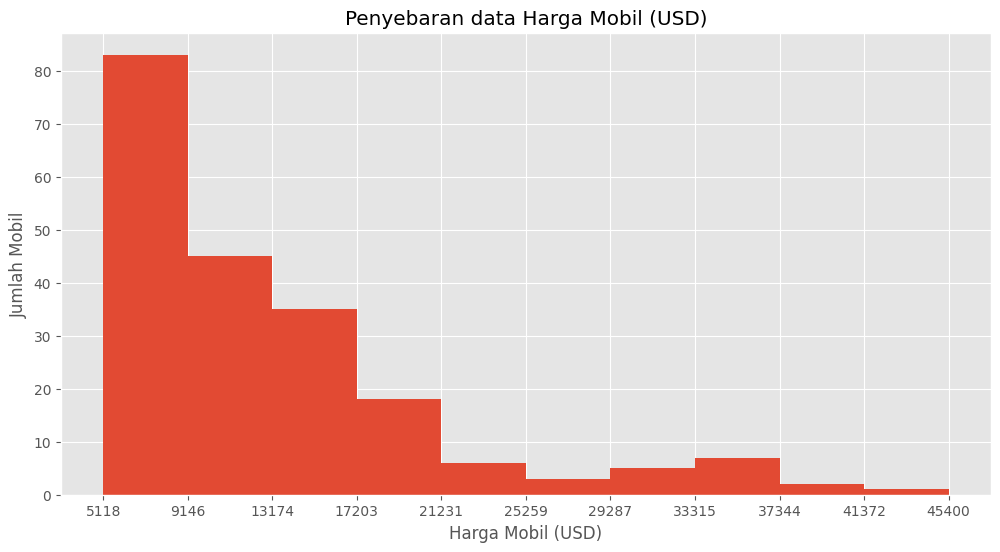

In [ ]:
buat_hist(data = df_car["price"], label="Penyebaran data Harga Mobil (USD)", labely="Jumlah Mobil", labelx="Harga Mobil (USD)")

dari histogram, mean, median, dan mode untuk harga mobil kita mengetahui bahwa:
- rata-rata harga mobil 13276
- median di 10295
- mode ada banyak, salah satunya 5572
- histogram menunjukkan paling banyak mobil di harga antara 5118-9146

## latihan pendek
- hitunglah mean, median, dan mode sebuah set data. misalkan carlength, biasanya panjang mobil berapa sih?
- buatlah histogram

berikan sedikit komentar

In [ ]:
def buat_hist(data, label="", labely="", labelx="", size=(12,6)):
  print("mean:", data.mean())
  print("median:", data.median())
  print("mode:", data.mode()[0])

  freq, bin_edges = np.histogram(data)
  data.plot(kind="hist", figsize=size)
  plt.xticks(bin_edges)

  plt.title(label)
  plt.ylabel(labely)
  plt.xlabel(labelx)

  plt.show()

mean: 174.04926829268288
median: 173.2
mode: 157.3


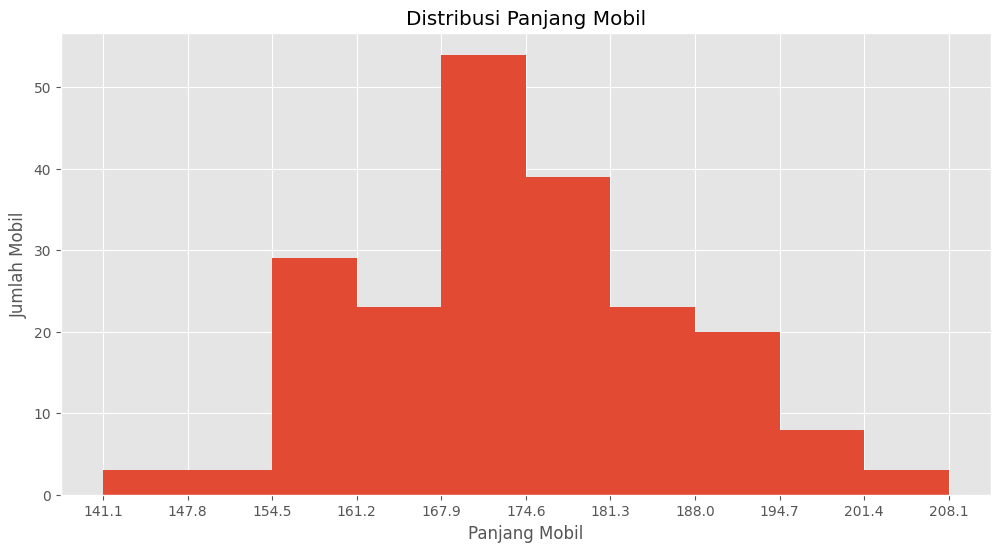

In [ ]:
buat_hist(df_car["carlength"], label="Distribusi Panjang Mobil", labely="Jumlah Mobil", labelx="Panjang Mobil")

rata-rata panjang mobil ada di 174inch atau sekitar 4.4 meter. median di 173.2 inch, tidak jauh berbeda dengan rata-ratanya. mean dan median yang berdekatan menunjukkan kalau data 'sepertinya' terdistribusi secara normal.

modenya di 157.3inch. tapi seperti biasa untuk data yang sifatnya continuous seperti panjang, mode tidak terlalu menjelaskan datanya.

# Mean
sebenarnya selain rata-rata biasa mean, ada beberapa jenis mean lainnya.
- weighted
- geometric
- harmonic

**weighted mean** digunakan saat bobot setiap nilai berbeda. kita tanyakan juga bobotnya berapa. misalkan data tentang peer dan ujian, dimana setiap peer 10% dan setiap ujian 20%. ujian dianggap lebih penting. lalu ujian akhir 30% dianggap paling penting.

contoh data: [100, 20, 100, 70, 80, 50] untuk total 100% dimana 3 peer, 2 ujian, dan 1 ujian akhir

tergantung nilai mana yang adalah ujian akhir, rata2 student ini bisa sangat berbeda

In [ ]:
nilai = np.array([100, 20, 100, 70, 80, 50])

# mean
print("mean:", nilai.mean())

# weighted mean
bobot = np.array([0.1, 0.1, 0.1, 0.2, 0.2, 0.3])
print("weighted mean 1:", np.average(nilai, weights=bobot))


bobot = np.array([0.3, 0.2, 0.2, 0.1, 0.1, 0.1])
print("weighted mean 2:", np.average(nilai, weights=bobot))

mean: 70.0
weighted mean 1: 67.0
weighted mean 2: 74.00000000000001


**geometric mean** kita gunakan saat alat ukur antara angka yang mau kita rata-rata berbeda.

misalkan kita mau beli barang, ada seller A yang punya 8500 reviews, dengan rating 4.5 bintang. ada seller B yang punya 7900 reviews, dengan rating 4.9 bintang. seller mana yang "rata-rata" lebih baik?

kita kalikan 8500*4.5 lalu di akar.semua angka yang beda beda cara ukurnya jadi sebuah angka gabungan. kita gunakan angka gabungan ini sebagai rata-rata

namanya adalah geomeric mean karena secara visual dia tetap mengambil jumlah area/ volume yang sama.

In [ ]:
seller_A = np.array([8500, 4.5])
seller_B = np.array([7900, 4.9])

print("A:", scipy.stats.gmean(seller_A))
print("B:", scipy.stats.gmean(seller_B))

A: 195.5760721560796
B: 196.74857051577263


dari geometric mean nya, kita bisa tentukan kalau seller B sedikit lebih baik

**harmonic mean** digunakan saat data memiliki outlier yang membuat rata-rata biasa terlalu jauh dari kenyataan.

kita hitung harmonic mean dengan meng-inverse data. hitung rata-rata. baru inverse balik.

contoh: di sebuah perusahaan startup ada 3 karyawan `[100, 80, 4]` dengan gaji yang sangat berbeda. berapa rata-rata gaji di perusahaan ini?

In [ ]:
gaji = np.array([100, 80, 50, 120, 90, 4])

print("mean:", gaji.mean())
print("harmonic mean:", scipy.stats.hmean(gaji))

mean: 74.0
harmonic mean: 19.23419412288513


harmonic mean memberikan bobot yang lebih tinggi ke nilai nilai kecil. jadi jika kita punya data yang kebanyakan nilainya kecil, dengan beberapa nilai yang (jarang) besar, maka harmonic mean lebih menunjukkan "tengah" daripada mean biasa.

In [ ]:
gaji = np.array([100, 80, 4, 3.5, 4.2, 2, 3, 6])

print("mean:", gaji.mean())
print("harmonic mean:", scipy.stats.hmean(gaji))

mean: 25.3375
harmonic mean: 4.453575452316257



- coba cari weighted mean, geometric mean, dan harmonic mean.

## Measure of Spread
menghitung penyebaran data
- standard deviation (dan temannya variance)
- min, max, range
- percentile
  - quartile adalah percentile ke 25, 50, dan 75
  - nama lain percentile ke 50, adalah median, juga quartile 2
  - inter-quartile range, adalah perbedaan antara Q3 dan Q1

- skewness
- kurtosis


In [ ]:
df_car['carlength']

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: carlength, Length: 205, dtype: float64

mean: 174.04926829268288
median: 173.2
mode: 157.3


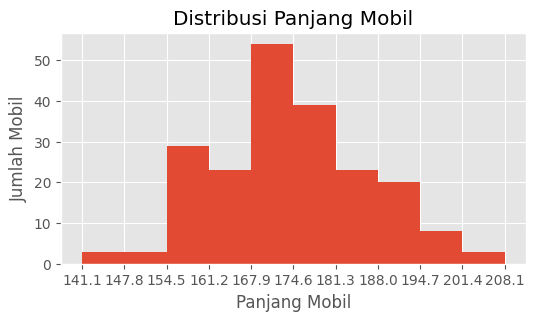

In [ ]:
buat_hist(df_car["carlength"], label="Distribusi Panjang Mobil", labely="Jumlah Mobil", labelx="Panjang Mobil", size=(6,3))

In [ ]:
# diatas adalah "tengah" datanya, "penyebarannya" bagaimana?
df_car["carlength"].std()

12.33728852655518

secara kasar, biasanya panjang mobil ada di 174 +- 12 inch

nanti cara benarnya secara statistik untuk mendapat range rata-rata "confidence interval" ada di sesi berikut.

selain standard deviation yang menunjukkan penyebaran data dari mean, kita bisa lihat juga min dan max. lalu range.

In [ ]:
print("min", df_car["carlength"].min())
print("max", df_car["carlength"].max())
print("range", df_car["carlength"].max() - df_car["carlength"].min())

min 141.1
max 208.1
range 67.0


top 10% students minimal nilainya berapa?

dengan satu angka percentil ke-90, kita bisa tau student yang dapat nilai sekian atau lebih masuk peringkat 10% teratas.

In [ ]:
# percentile dan quartile
# 10% mobil terpanjang minimal berapa inch?

df_car[["carlength"]].quantile(0.9)

carlength    188.8
Name: 0.9, dtype: float64

jika sebuah mobil panjangnya 188.8inch atau lebih, maka dia termasuk top 10% mobil terpanjang.

biasanya kita mau tau quartiles nya, 3 angka Q1 Q2 Q3
- Q1 = Quartile 1 = Percentile 25
- Q2 = Quartile 2 = Percentile 50 = median
- Q3 = Quartile 3 = Percentile 75

bahkan kalau di boxplot, selain 3 angka ini kita juga belikat min dan max yang ada di dalam IQR
- IQR = Inter-Quartile Range = Q3-Q1
- min max yang di boxplot biasanya:
  - max `Q3 + 1.5*IQR`, angka yang lebih besar dari ini dianggap outlier
  - min `Q1 - 1.5*IQR`, angka yang lebih kecil dari ini dianggap outlier

In [ ]:
df_car[["carlength"]].quantile([0.25, 0.50, 0.75])

,carlength
0.25,166.3
0.50,173.2
0.75,183.1


In [ ]:
df_car["carlength"].quantile([0.25, 0.50, 0.75])

0.25    166.3
0.50    173.2
0.75    183.1
Name: carlength, dtype: float64

In [ ]:
[q1, q2, q3] = df_car["carlength"].quantile([0.25, 0.50, 0.75])
print(q1, q2, q3)

166.3 173.2 183.1


In [ ]:
# iqr
iqr = q3-q1
print("IQR", iqr)

IQR 16.799999999999983


In [ ]:
print("max dalam IQR", q3 + 1.5*iqr)
print("min dalam IQR", q1 - 1.5*iqr)

max dalam IQR 208.29999999999995
min dalam IQR 141.10000000000002


boxplot menunjukkan semua angka ini secara visual

<Axes: >

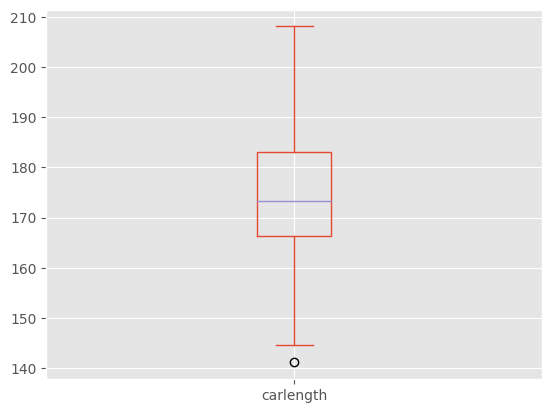

In [ ]:
df_car["carlength"].plot(kind="box")

skewness

untuk data yang terdistribusi secara normal seperti carlength diatas, apakah bentuk histogram datanya miring miring atau simetris?


kurtosis

apakah histogramnya lancip ke atas atau tumpul?

In [ ]:
df_car[["carlength"]].skew()

carlength    0.155954
dtype: float64

karena skewness hampir 0, dan positive, artinya distribusi datanya hampir simetris, sedikit miring ke arah kiri

In [ ]:
df_car[["carlength"]].kurtosis()

carlength   -0.082895
dtype: float64

boleh review materi yang barusan dipelajari. boleh kumpulkan q&a yang mau di explore.

summarize

- histogram
- mean, median, mode
- mean yang spesial (weighted, harmonic, geometric)
- standard deviation
- min, max, range
- percentiles, quartiles, inter-quartile range
- boxplot
- skewness, kurtosis

# Correlation
hubungan antara 2 set data

r

correlation coefficient r

r ini menunjukkan bagaimana 2 set data ter-korelasi. apakah positif atau negatif. apakah kuat atau lemah.

r = 1 --> korelasi positif kuat, sempurna, 1 banding 1

jika berat badan (kg) dan tinggi (cm) badan memiliki korelasi r=1, maka setiap kg yang ditambah ke berat badan, tinggi akan ikutan naik 1cm.

r = 0 --> tidak ada korelasi sama sekali

jika berat badan (kg) dan tinggi (cm) badan memiliki korelasi r=0, maka tidak peduli berat badannya berapa, tidak ada hubungan dengan tinggi badan. bisa saja berat banget pendek atau tinggi. bisa saja enteng banget pendek atau tinggi.

r = -1 --> korelasi negatif kuat, sempurna, 1 banding 1

jika berat badan (kg) dan tinggi (cm) badan memiliki korelasi r=1, maka setiap kg yang ditambah ke berat badan, tinggi akan turun 1cm.

nilai r yang ada di antara -1 dan 1, menunjukkan korelasi antara dua set data.

In [ ]:
df_car[["carlength","carwidth"]]

,carlength,carwidth
0,168.8,64.1
1,168.8,64.1
2,171.2,65.5
3,176.6,66.2
4,176.6,66.4
...,...,...
200,188.8,68.9
201,188.8,68.8
202,188.8,68.9
203,188.8,68.9


apakah ada korelasi antara panjang dan lebar mobil?

In [ ]:
df_car[["carlength","carwidth"]].corr()

,carlength,carwidth
carlength,1.000000,0.841118
carwidth,0.841118,1.000000


<Axes: xlabel='carlength', ylabel='carwidth'>

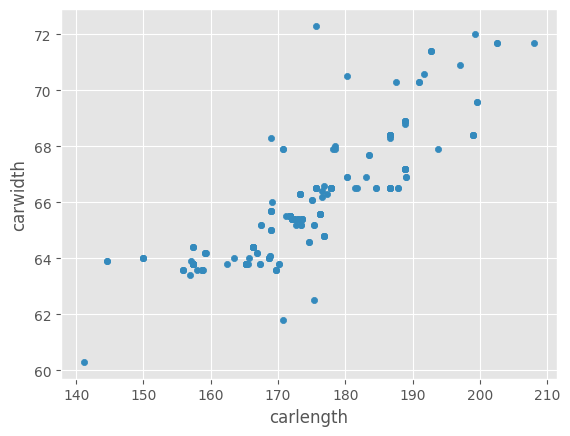

In [ ]:
df_car[["carlength","carwidth"]].plot(kind="scatter", x="carlength", y="carwidth")

seperti yang terlihat di grafik scatter plot diatas, ada korelasi positif, semakin panjang mobilnya, sepertinya semakin lebar juga mobilnya.

angka korelasi r lumayan tinggi dan positif di 0.84

apakah mobil semakin panjang maka semakin mahal?

In [ ]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df_car[["carlength","price"]].corr()

,carlength,price
carlength,1.00000,0.68292
price,0.68292,1.00000


<Axes: xlabel='carlength', ylabel='price'>

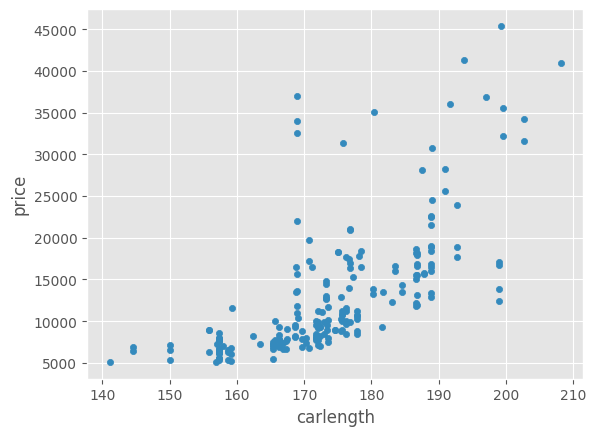

In [ ]:
df_car.plot(kind="scatter",
           x="carlength",
           y="price")

sepertinya semakin panjang mobilnya, memang semakin mahal

korelasinya tidak sekuat makin panjang maka makin lebar.

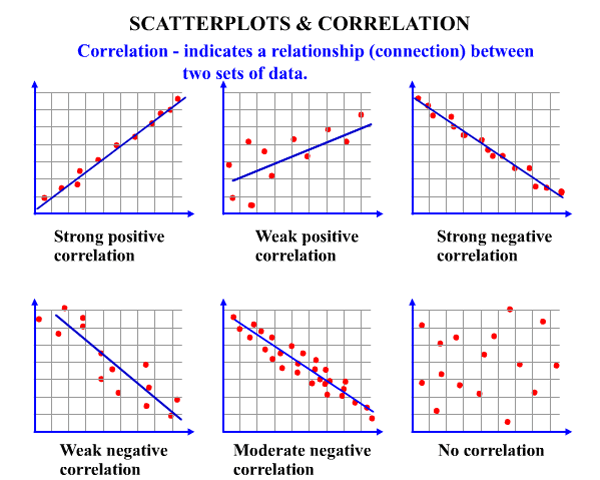

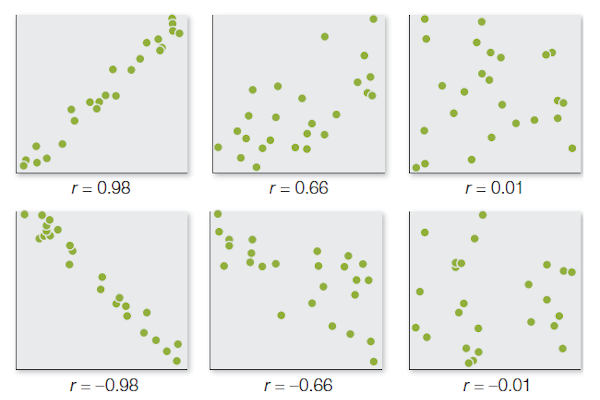

korelasi yang lebih kuat, datanya lebih sedikit penyebarannya

## Summary of Descriptive Statistics

tadi kita mencari banyak jenis angka statistik berbeda, yang masing masing kegunaannya berbeda.

ada yg menjelaskan tengah, penyebaran, korelasi, bentuk distribusi data.

daripada dicari satu satu manual. kita bisa pakai juga function yang cari semuanya sekaligus.

seperti:
- pandas punya describe
- scipy stats punya describe

In [ ]:
# contoh, data mobil kita

# pandas punya describe
df_car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


dia langsung kasih:
- count, jumlah data
- mean, rata-rata
- std, standard deviation
- min,
- q1,
- q2,
- q3,
- max

untuk semua kolom data yang data type nya numerik.

In [ ]:
x = df_car["price"]

scipy.stats.describe(x, ddof=1, bias=False)

DescribeResult(nobs=205, minmax=(5118.0, 45400.0), mean=13276.710570731706, variance=63821761.57839796, skewness=1.777678156091445, kurtosis=3.0516478713963995)

scipy stats describe memberikan informasi untuk 1 Series, 1 kolom data saja. dia kasih:
- nobs, count, jumlah data
- minmax, min dan max dalam sebuah tuple
- mean, rata-rata
- variance, kalau di akar akan dapat std
- skewness
- kurtosis


tergantung angka statistic yang mana yang lagi mau kita cari, kita bisa:
- cari satu satu
- pakai describe dari pandas, extract yg diinginkan
- pakai describe dari scipy.stats, extract yg diinginkan